# MMPose Model Comparison

- **RTMO**: One-stage real-time multi-person pose estimation 
- **RTMPose**: Two-stage real-time pose estimation 
- **Lite-HRNet**: Lightweight High-Resolution Network

**Note**: MMCV needs to be built and installed from source so that `mmcv._ext` is included:

```sh
git clone --branch v2.1.0 https://github.com/open-mmlab/mmcv
cd mmcv

# with the virtual environment active
python setup.py build_ext
python setup.py develop
python setup.py install
```

See the issues below for more details
- https://github.com/open-mmlab/mmcv/issues/3244
- https://github.com/open-mmlab/mmcv/issues/3310

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from pathlib import Path
import pandas as pd
from mmpose.apis.inferencers import MMPoseInferencer


sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)

## Model Configuration

In [ ]:
MODELS = [
    # RTMO models (one-stage, no detector needed)
    {
        'family': 'RTMO',
        'size': 's',
        'alias': 'rtmo-s_8xb32-600e_body7-640x640',
        'display_name': 'RTMO-s',
        'inferencer': None
    },
    {
        'family': 'RTMO',
        'size': 'm',
        'alias': 'rtmo-m_16xb16-600e_body7-640x640',
        'display_name': 'RTMO-m',
        'inferencer': None
    },
    # RTMPose models (two-stage, requires detector)
    {
        'family': 'RTMPose',
        'size': 's',
        'alias': 'rtmpose-s_8xb256-420e_coco-256x192',
        'display_name': 'RTMPose-s',
        'inferencer': None
    },
    {
        'family': 'RTMPose',
        'size': 'm',
        'alias': 'rtmpose-m_8xb256-420e_coco-256x192',
        'display_name': 'RTMPose-m',
        'inferencer': None
    },
    # Lite-HRNet models (two-stage, faster than HRNet with good accuracy)
    {
        'family': 'Lite-HRNet',
        'size': '18',
        'alias': 'td-hm_litehrnet-18_8xb64-210e_coco-256x192',
        'display_name': 'Lite-HRNet-18',
        'inferencer': None
    },
    {
        'family': 'Lite-HRNet',
        'size': '30',
        'alias': 'td-hm_litehrnet-30_8xb64-210e_coco-256x192',
        'display_name': 'Lite-HRNet-30',
        'inferencer': None
    }
]

print("Models to compare:")
for model in MODELS:
    print(f"  - {model['display_name']:15s} ({model['family']})")

Models to compare:
  - RTMO-s          (RTMO)
  - RTMO-m          (RTMO)
  - RTMPose-s       (RTMPose)
  - RTMPose-m       (RTMPose)
  - Lite-HRNet-18   (Lite-HRNet)
  - Lite-HRNet-30   (Lite-HRNet)


## Video Discovery

Find all video files in the dataset directory and display their information.

In [3]:
def extract_shot_type(video_path):
    # Format: joined_{ShotType}_{clips}_{timestamp}.mp4
    parts = video_path.stem.split('_')
    shot_parts = []
    for part in parts[1:]:  # Skip 'joined'
        if part.isdigit() or part.endswith('clips'):
            break
        shot_parts.append(part)
    return '_'.join(shot_parts)

def print_video_info(video_path):
    cap = cv2.VideoCapture(str(video_path))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    duration = frame_count / fps if fps > 0 else 0
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cap.release()
    
    shot_type = extract_shot_type(video_path)
    print(f"  {shot_type:20s} | {frame_count:4d} frames | {duration:5.1f}s | {width}x{height}")

dataset_path = Path("./dataset")
VIDEOS = sorted(list(dataset_path.glob("*.mp4")))

print(f"Found {len(VIDEOS)} videos:\n")
for video_path in VIDEOS:
    print_video_info(video_path)

Found 8 videos:

  Backhand             |  224 frames |   7.5s | 1920x1080
  Backhand_Volley      |  374 frames |  12.5s | 1920x1080
  Contrapared          |   42 frames |   1.4s | 1920x1080
  Forehand             |  349 frames |  11.6s | 1920x1080
  Forehand_Volley      |  184 frames |   6.1s | 1920x1080
  Lob                  |  223 frames |   7.4s | 1920x1080
  Smash                |  147 frames |   4.9s | 1920x1080
  Vibora               |  234 frames |   7.8s | 1920x1080


## Load Models

In [ ]:
def load_models():
    print("Loading models...\n")
    for model_config in MODELS:
        try:
            inferencer = MMPoseInferencer(
                pose2d=model_config['alias'],
                device='cpu'
            )
            
            model_config['inferencer'] = inferencer
            print("✓")
            
        except Exception as e:
            error_msg = str(e)
            print(f"✗ Error: {error_msg}")
            model_config['inferencer'] = None

load_models()

Loading models...

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmo/rtmo-s_8xb32-600e_body7-640x640-dac2bf74_20231211.pth
✓
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmo/rtmo-m_16xb16-600e_body7-640x640-39e78cc4_20231211.pth


/Users/roberto/Desktop/UNIR-IA/Trabajo-Fin-de-Estudio/padel-cv/.venv/lib/python3.11/site-packages/mmpose/datasets/datasets/utils.py:102: UserWarning: The metainfo config file "configs/_base_/datasets/coco.py" does not exist. A matched config file "/Users/roberto/Desktop/UNIR-IA/Trabajo-Fin-de-Estudio/padel-cv/.venv/lib/python3.11/site-packages/mmpose/.mim/configs/_base_/datasets/coco.py" will be used instead.
  warnings.warn(
/Users/roberto/Desktop/UNIR-IA/Trabajo-Fin-de-Estudio/padel-cv/.venv/lib/python3.11/site-packages/mmpose/datasets/datasets/utils.py:102: UserWarning: The metainfo config file "configs/_base_/datasets/coco.py" does not exist. A matched config file "/Users/roberto/Desktop/UNIR-IA/Trabajo-Fin-de-Estudio/padel-cv/.venv/lib/python3.11/site-packages/mmpose/.mim/configs/_base_/datasets/coco.py" will be used instead.
  warnings.warn(
/Users/roberto/Desktop/UNIR-IA/Trabajo-Fin-de-Estudio/padel-cv/.venv/lib/python3.11/site-packages/mmpose/datasets/datasets/utils.py:102: Use

✓
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-s_simcc-coco_pt-aic-coco_420e-256x192-8edcf0d7_20230127.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth
✓
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-coco_pt-aic-coco_420e-256x192-d8dd5ca4_20230127.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth
✓
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-coco_pt-aic-coco_420e-256x192-d8dd5ca4_20230127.pth
Loads chec

/Users/roberto/Desktop/UNIR-IA/Trabajo-Fin-de-Estudio/padel-cv/.venv/lib/python3.11/site-packages/mmpose/datasets/datasets/utils.py:102: UserWarning: The metainfo config file "configs/_base_/datasets/coco.py" does not exist. A matched config file "/Users/roberto/Desktop/UNIR-IA/Trabajo-Fin-de-Estudio/padel-cv/.venv/lib/python3.11/site-packages/mmpose/.mim/configs/_base_/datasets/coco.py" will be used instead.
  warnings.warn(


✓
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/top_down/litehrnet/litehrnet30_coco_256x192-4176555b_20210626.pth
Downloading: "https://download.openmmlab.com/mmpose/top_down/litehrnet/litehrnet30_coco_256x192-4176555b_20210626.pth" to /Users/roberto/.cache/torch/hub/checkpoints/litehrnet30_coco_256x192-4176555b_20210626.pth


/Users/roberto/Desktop/UNIR-IA/Trabajo-Fin-de-Estudio/padel-cv/.venv/lib/python3.11/site-packages/mmpose/datasets/datasets/utils.py:102: UserWarning: The metainfo config file "configs/_base_/datasets/coco.py" does not exist. A matched config file "/Users/roberto/Desktop/UNIR-IA/Trabajo-Fin-de-Estudio/padel-cv/.venv/lib/python3.11/site-packages/mmpose/.mim/configs/_base_/datasets/coco.py" will be used instead.
  warnings.warn(


Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth
✓
✓


## Benchmarking Function

In [ ]:
def benchmark_model_on_video(inferencer, model_name, video_path, max_frames=100):
    cap = cv2.VideoCapture(str(video_path))

    metrics = {
        'model_name': model_name,
        'video': video_path.name,
        'frames_processed': 0,
        'frame_times': [],
        'people_detected': [],
        'total_people': 0
    }
    
    frame_count = 0
    
    while cap.isOpened() and frame_count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Run inference and time it
        start_time = time.time()
        
        # MMPoseInferencer returns a generator
        result_generator = inferencer(frame, return_vis=False, return_datasamples=False)
        results = next(result_generator)
        
        inference_time = time.time() - start_time
        metrics['frame_times'].append(inference_time)
        
        # Count detected people
        predictions = results.get('predictions', [[]])
        num_people = len(predictions[0]) if predictions and len(predictions) > 0 else 0
        
        metrics['people_detected'].append(num_people)
        metrics['total_people'] += num_people
        metrics['frames_processed'] += 1
        frame_count += 1
    
    cap.release()
    
    # Summary statistics
    if metrics['frame_times']:
        metrics['avg_inference_time'] = np.mean(metrics['frame_times'])
        metrics['fps'] = 1.0 / metrics['avg_inference_time'] if metrics['avg_inference_time'] > 0 else 0
    
    if metrics['people_detected']:
        metrics['avg_people_per_frame'] = np.mean(metrics['people_detected'])
    
    return metrics

## Run Benchmarks

Execute inference on all models and collect performance data. This may take a few minutes.

In [8]:
FRAMES_TO_PROCESS = 100
all_results = []

print("Starting benchmark...")
print(f"   Models: {len([m for m in MODELS if m['inferencer'] is not None])}")
print(f"   Videos: {len(VIDEOS)}")
print(f"   Frames per video: {FRAMES_TO_PROCESS}")
print(f"   Total runs: {len([m for m in MODELS if m['inferencer'] is not None]) * len(VIDEOS)}\n")

for model_config in MODELS:
    if model_config['inferencer'] is None:
        print(f"Skipping {model_config['display_name']} (failed to load)")
        continue
    
    inferencer = model_config['inferencer']
    model_name = model_config['display_name']
    
    print(f"\n{'='*60}")
    print(f"Testing: {model_name}")
    print(f"{'='*60}")
    
    for video_path in VIDEOS:
        print(f"  Processing {video_path.name}...", end=" ", flush=True)

        metrics = benchmark_model_on_video(
            inferencer=inferencer,
            model_name=model_name,
            video_path=video_path,
            max_frames=FRAMES_TO_PROCESS
        )
        all_results.append(metrics)
        print(f"✓ {metrics['fps']:.1f} FPS, {metrics['avg_people_per_frame']:.1f} people/frame")

print(f"\n\nBenchmark complete! Collected {len(all_results)} results.")

Starting benchmark...
   Models: 6
   Videos: 8
   Frames per video: 100
   Total runs: 48


Testing: RTMO-s
  Processing joined_Backhand_15clips_20251103_210348.mp4... 

/Users/roberto/Desktop/UNIR-IA/Trabajo-Fin-de-Estudio/padel-cv/.venv/lib/python3.11/site-packages/mmpose/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/Users/roberto/Desktop/UNIR-IA/Trabajo-Fin-de-Estudio/padel-cv/.venv/lib/python3.11/site-packages/torch/functional.py:505: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:4319.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


✓ 13.9 FPS, 2.3 people/frame
  Processing joined_Backhand_Volley_29clips_20251103_210348.mp4... ✓ 13.2 FPS, 2.5 people/frame
  Processing joined_Contrapared_3clips_20251103_210348.mp4... ✓ 13.2 FPS, 2.5 people/frame
  Processing joined_Contrapared_3clips_20251103_210348.mp4... ✓ 13.2 FPS, 3.0 people/frame
  Processing joined_Forehand_25clips_20251103_210348.mp4... ✓ 13.2 FPS, 3.0 people/frame
  Processing joined_Forehand_25clips_20251103_210348.mp4... ✓ 14.1 FPS, 2.3 people/frame
  Processing joined_Forehand_Volley_14clips_20251103_210349.mp4... ✓ 14.1 FPS, 2.3 people/frame
  Processing joined_Forehand_Volley_14clips_20251103_210349.mp4... ✓ 13.5 FPS, 2.7 people/frame
  Processing joined_Lob_15clips_20251103_210349.mp4... ✓ 13.5 FPS, 2.7 people/frame
  Processing joined_Lob_15clips_20251103_210349.mp4... ✓ 13.6 FPS, 2.3 people/frame
  Processing joined_Smash_7clips_20251103_210349.mp4... ✓ 13.6 FPS, 2.3 people/frame
  Processing joined_Smash_7clips_20251103_210349.mp4... ✓ 12.9 FPS, 3.

/Users/roberto/Desktop/UNIR-IA/Trabajo-Fin-de-Estudio/padel-cv/.venv/lib/python3.11/site-packages/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/Users/roberto/Desktop/UNIR-IA/Trabajo-Fin-de-Estudio/padel-cv/.venv/lib/python3.11/site-packages/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


✓ 2.1 FPS, 5.4 people/frame
  Processing joined_Backhand_Volley_29clips_20251103_210348.mp4... ✓ 2.2 FPS, 5.9 people/frame
  Processing joined_Contrapared_3clips_20251103_210348.mp4... ✓ 2.2 FPS, 5.9 people/frame
  Processing joined_Contrapared_3clips_20251103_210348.mp4... ✓ 2.1 FPS, 5.4 people/frame
  Processing joined_Forehand_25clips_20251103_210348.mp4... ✓ 2.1 FPS, 5.4 people/frame
  Processing joined_Forehand_25clips_20251103_210348.mp4... ✓ 2.1 FPS, 5.1 people/frame
  Processing joined_Forehand_Volley_14clips_20251103_210349.mp4... ✓ 2.1 FPS, 5.1 people/frame
  Processing joined_Forehand_Volley_14clips_20251103_210349.mp4... ✓ 2.2 FPS, 5.2 people/frame
  Processing joined_Lob_15clips_20251103_210349.mp4... ✓ 2.2 FPS, 5.2 people/frame
  Processing joined_Lob_15clips_20251103_210349.mp4... ✓ 2.2 FPS, 5.1 people/frame
  Processing joined_Smash_7clips_20251103_210349.mp4... ✓ 2.2 FPS, 5.1 people/frame
  Processing joined_Smash_7clips_20251103_210349.mp4... ✓ 2.1 FPS, 6.1 people/fra

## Results

In [10]:
# Convert results to DataFrame
df_results = pd.DataFrame([{
    'model': r['model_name'],
    'video': r['video'],
    'fps': r['fps'],
    'avg_inference_ms': r['avg_inference_time'] * 1000,
    'avg_people': r['avg_people_per_frame'],
    'total_people': r['total_people']
} for r in all_results])

# Add model metadata (family and size)
family_map = {m['display_name']: m['family'] for m in MODELS}
size_map = {m['display_name']: m['size'] for m in MODELS}
df_results['family'] = df_results['model'].map(family_map)
df_results['size'] = df_results['model'].map(size_map)

print("Summary Statistics:")
print(df_results.groupby(['model', 'family'])[['fps', 'avg_inference_ms', 'avg_people']].mean())

Summary Statistics:
                                fps  avg_inference_ms  avg_people
model         family                                             
Lite-HRNet-18 Lite-HRNet   0.886347       1130.870471    5.591845
Lite-HRNet-30 Lite-HRNet   0.602267       1666.172083    5.591845
RTMO-m        RTMO         7.700133        129.921095    3.670000
RTMO-s        RTMO        13.406718         74.660383    2.578452
RTMPose-m     RTMPose      1.329993        752.290394    5.591845
RTMPose-s     RTMPose      2.142343        466.833197    5.591845


## Visualizations

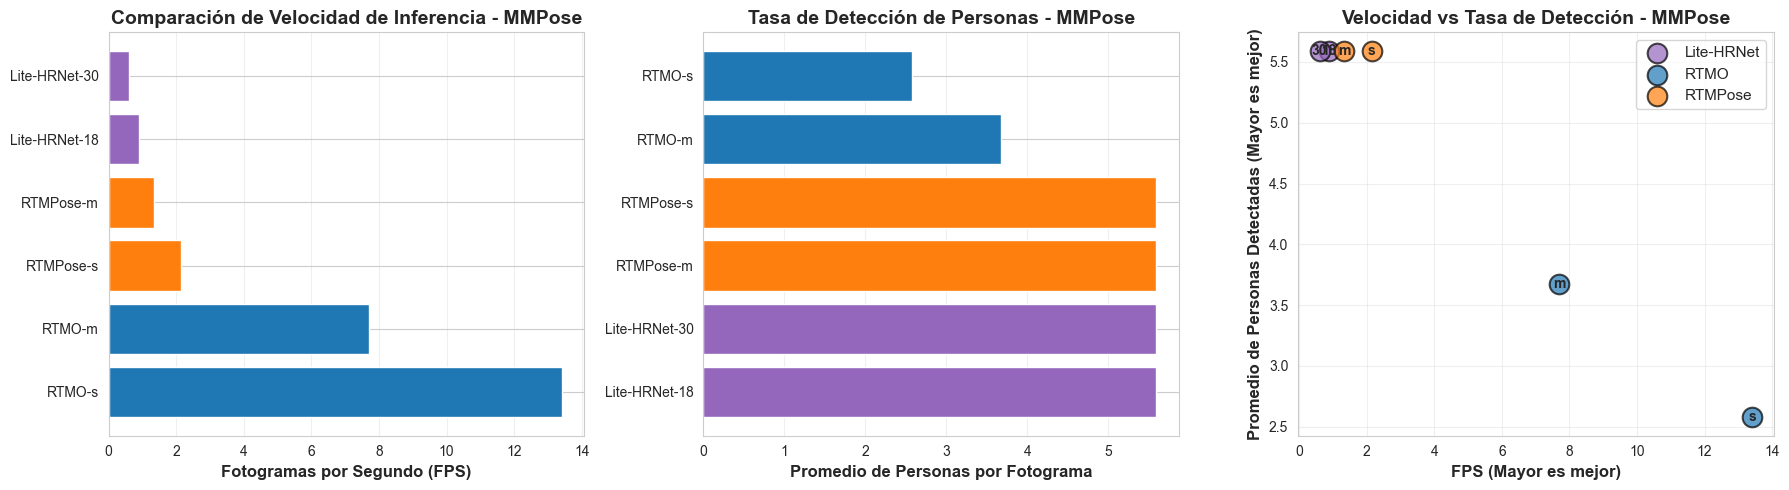

In [ ]:
# Aggregate by model (average across all videos)
df_by_model = df_results.groupby(['model', 'family', 'size']).agg({
    'fps': 'mean',
    'avg_people': 'mean'
}).reset_index()

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Color palette by family
family_colors = {
    'RTMO': '#1f77b4',        # Blue
    'RTMPose': '#ff7f0e',     # Orange
    'Lite-HRNet': '#9467bd',  # Purple
}
colors_list = [family_colors.get(f, '#7f7f7f') for f in df_by_model['family']]

# Plot 1: FPS comparison
ax1 = axes[0]
models_sorted = df_by_model.sort_values('fps', ascending=False)
bar_colors = [family_colors.get(f, '#7f7f7f') for f in models_sorted['family']]
bars = ax1.barh(models_sorted['model'], models_sorted['fps'], color=bar_colors)
ax1.set_xlabel('Fotogramas por Segundo (FPS)', fontsize=12, fontweight='bold')
ax1.set_title('Comparación de Velocidad de Inferencia - MMPose', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Plot 2: People detection rate
ax2 = axes[1]
models_sorted2 = df_by_model.sort_values('avg_people', ascending=False)
bar_colors2 = [family_colors.get(f, '#7f7f7f') for f in models_sorted2['family']]
bars2 = ax2.barh(models_sorted2['model'], models_sorted2['avg_people'], color=bar_colors2)
ax2.set_xlabel('Promedio de Personas por Fotograma', fontsize=12, fontweight='bold')
ax2.set_title('Tasa de Detección de Personas - MMPose', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Plot 3: FPS vs People Detection Rate (trade-off)
ax3 = axes[2]
for family in df_by_model['family'].unique():
    family_data = df_by_model[df_by_model['family'] == family]
    ax3.scatter(family_data['fps'], family_data['avg_people'], 
               s=200, alpha=0.7, color=family_colors.get(family, '#7f7f7f'), label=family,
               edgecolors='black', linewidth=1.5)
    
    # Add labels for each point (size)
    for idx, row in family_data.iterrows():
        ax3.annotate(row['size'], (row['fps'], row['avg_people']), 
                    fontsize=10, fontweight='bold', ha='center', va='center')

ax3.set_xlabel('FPS (Mayor es mejor)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Promedio de Personas Detectadas (Mayor es mejor)', fontsize=12, fontweight='bold')
ax3.set_title('Velocidad vs Tasa de Detección - MMPose', fontsize=14, fontweight='bold')
ax3.legend(fontsize=11)
ax3.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Pose Detection Samples

In [21]:
def compare_models_on_shots(shot_types, models_to_compare, frame_idx=50):
    """
    Compare MMPose models on different shot types.
    
    Args:
        shot_types: List of shot type names
        models_to_compare: List of model configs to compare
        frame_idx: Frame index to extract from each video
    """
    num_shots = len(shot_types)
    num_models = len(models_to_compare)
    
    # Create grid: rows = shot types, cols = models
    fig, axes = plt.subplots(num_shots, num_models, figsize=(8*num_models, 5*num_shots))
    
    # Ensure axes is 2D
    if num_shots == 1:
        axes = axes.reshape(1, -1)
    if num_models == 1:
        axes = axes.reshape(-1, 1)
    
    for shot_idx, shot_type in enumerate(shot_types):
        # Find video for this shot type
        video_path = None
        for video in VIDEOS:
            if extract_shot_type(video) == shot_type:
                video_path = video
                break
        
        if video_path is None:
            print(f"No se encontró video para {shot_type}")
            continue
        
        # Read frame
        cap = cv2.VideoCapture(str(video_path))
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()
        cap.release()
        
        if not ret:
            print(f"No se pudo leer el fotograma de {shot_type}")
            continue
        
        # Process with each model
        for model_idx, model_config in enumerate(models_to_compare):
            if model_config['inferencer'] is None:
                continue
                
            inferencer = model_config['inferencer']
            model_name = model_config['display_name']
            
            # Run inference with visualization
            start_time = time.time()
            result_generator = inferencer(frame, return_vis=True, return_datasamples=False)
            results = next(result_generator)
            inference_time = (time.time() - start_time) * 1000  # ms
            
            # Get predictions and visualization
            predictions = results.get('predictions', [[]])
            num_people = len(predictions[0]) if predictions and len(predictions) > 0 else 0
            
            # Get MMPose's built-in visualization (already annotated with skeleton)
            # MMPose visualization is already in RGB format, no conversion needed
            visualization = results.get('visualization', [None])[0]
            if visualization is not None:
                annotated_rgb = visualization
            else:
                # Fallback to original frame if no visualization (convert BGR to RGB)
                annotated_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            ax = axes[shot_idx, model_idx]
            ax.imshow(annotated_rgb)
            ax.set_title(
                f'{shot_type} - {model_name}\n{num_people} personas | {inference_time:.1f}ms',
                fontsize=12, fontweight='bold'
            )
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

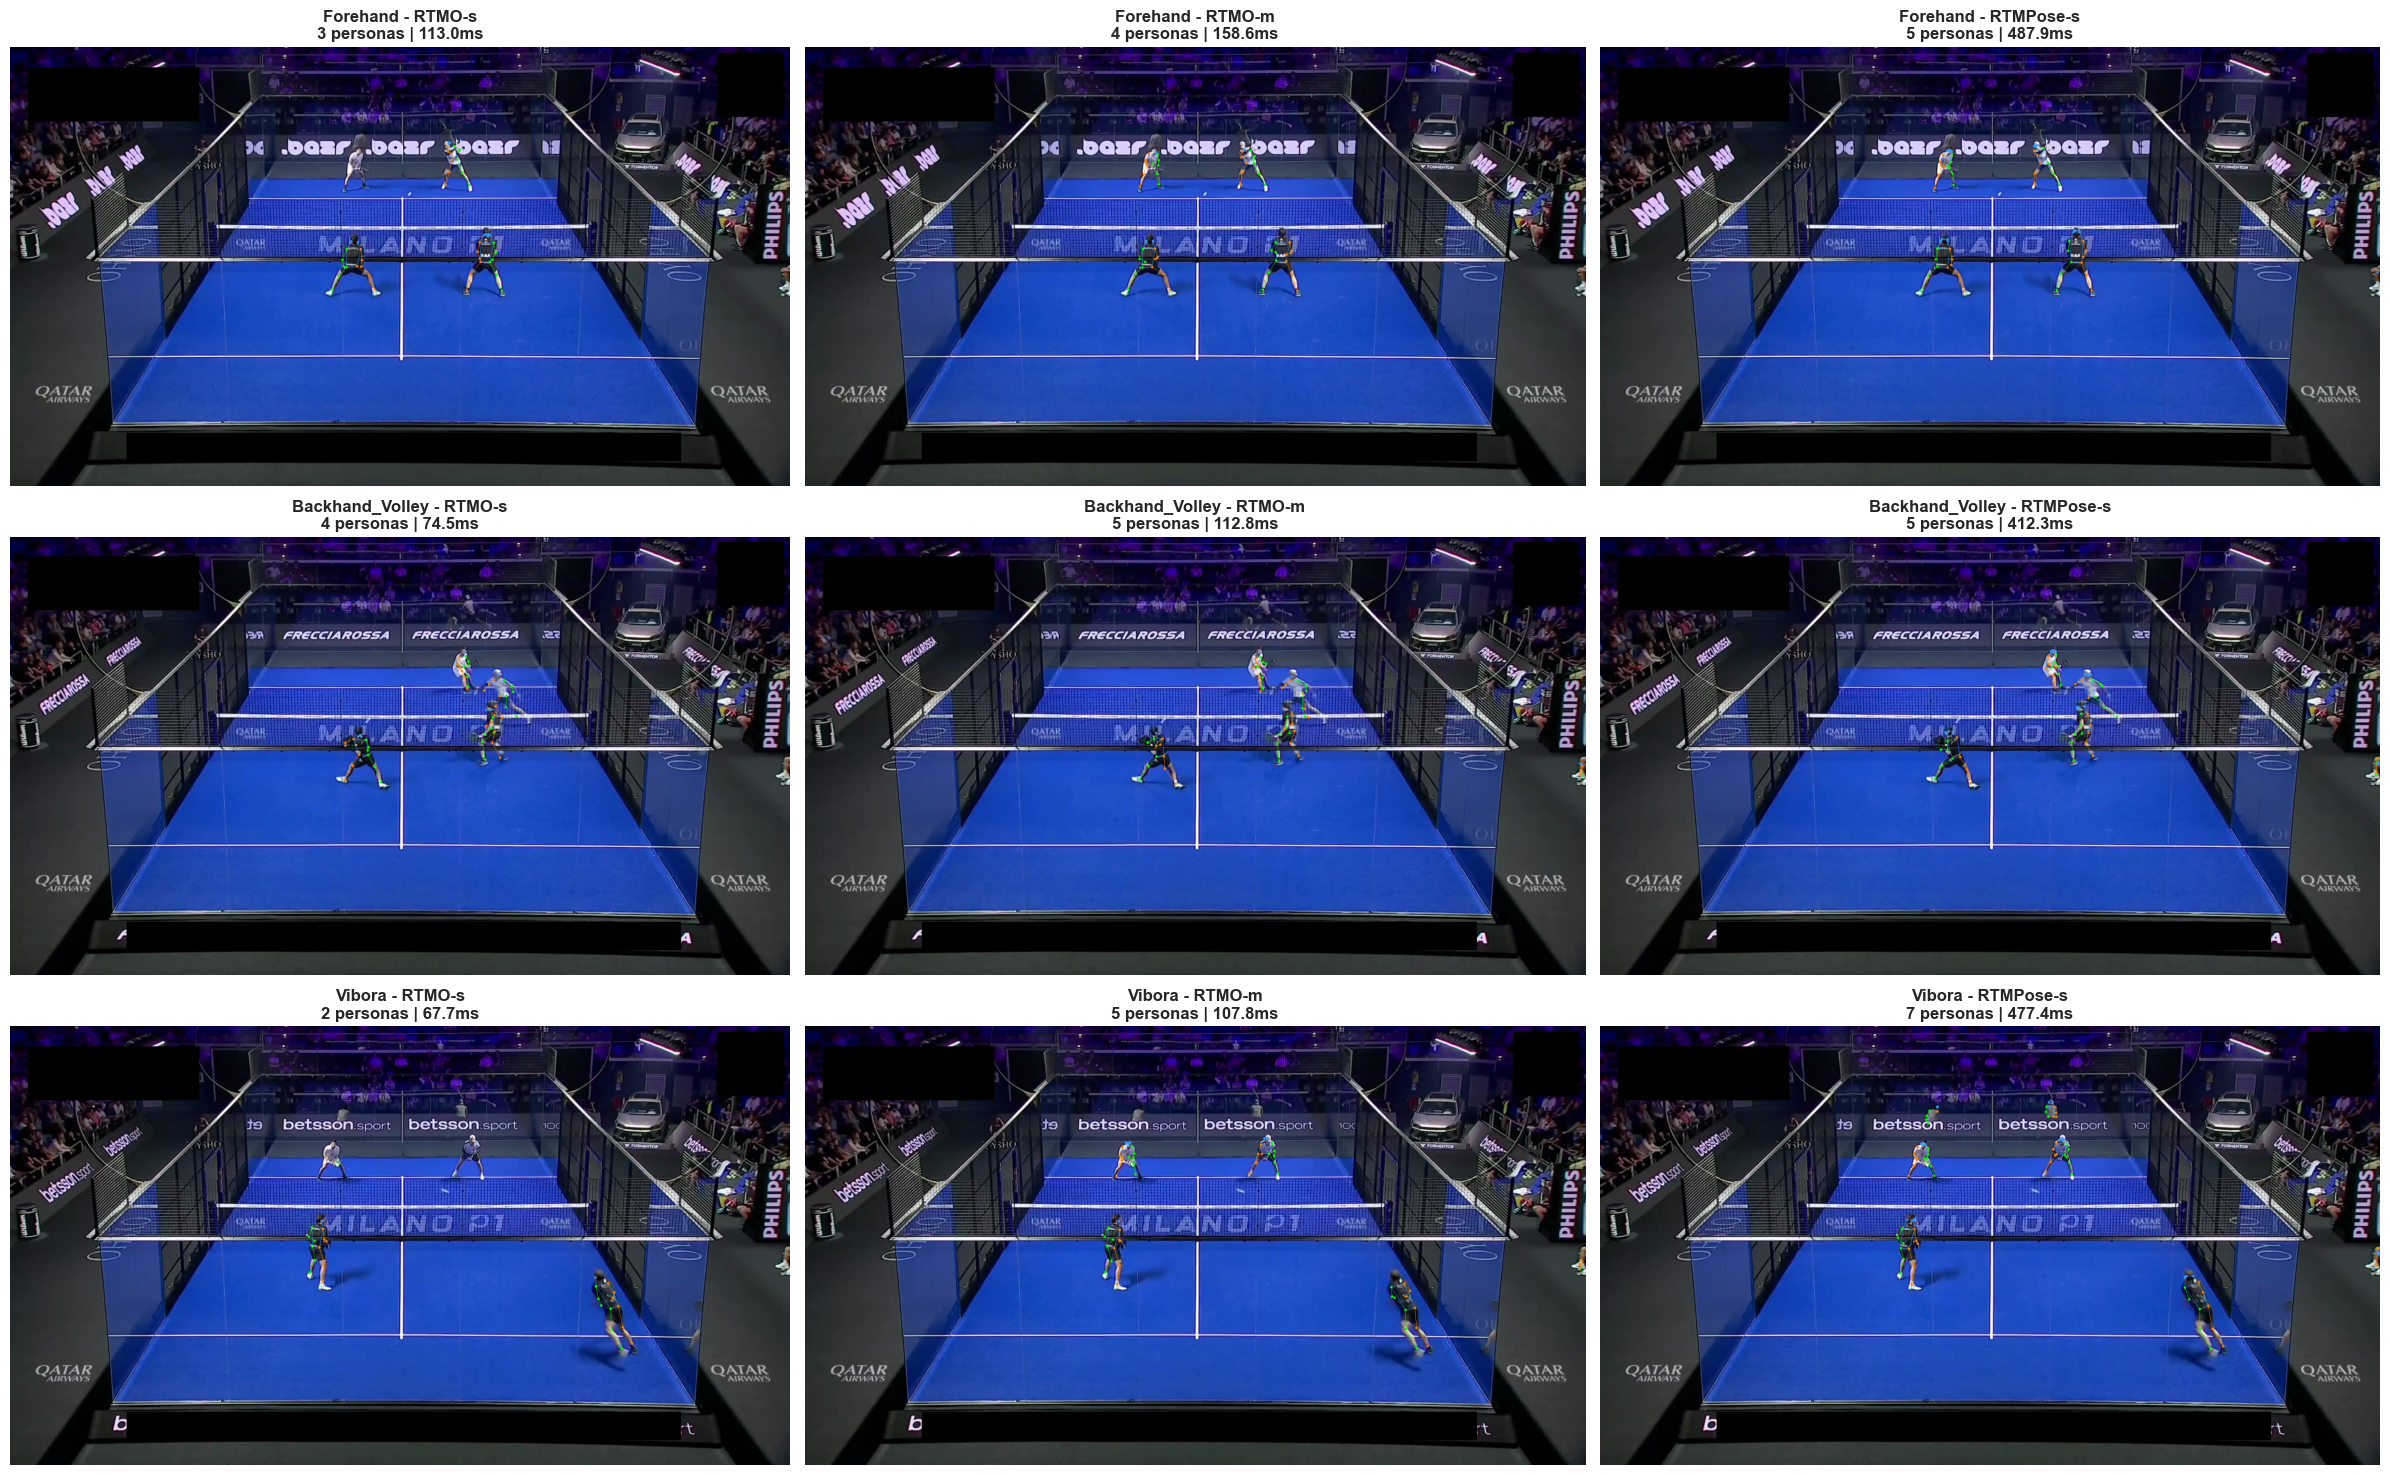

In [22]:
top_3_models = ["RTMO-s", "RTMO-m", "RTMPose-s"]
models_to_compare = []

for model_name in top_3_models:
    for model in MODELS:
        if model['display_name'] == model_name and model['inferencer'] is not None:
            models_to_compare.append(model)
            break

shot_types_to_compare = ['Forehand', 'Backhand_Volley', 'Vibora']
compare_models_on_shots(shot_types_to_compare, models_to_compare)

## Comparison with YOLO Results

Compare MMPose results with YOLO from the other notebook.

In [23]:
# Summary by model family
print("MMPose Performance Summary by Family:")
print("="*60)
family_summary = df_by_model.groupby('family').agg({
    'fps': ['mean', 'min', 'max'],
    'avg_people': 'mean'
}).round(2)
print(family_summary)

print("\n\nDetailed Performance by Model:")
print("="*60)
summary = df_by_model.sort_values('fps', ascending=False)
for idx, row in summary.iterrows():
    print(f"{row['model']:20s} ({row['family']:12s}) | {row['fps']:6.1f} FPS | {row['avg_people']:.2f} people/frame")

print("\n\nKey Observations:")
print("- RTMO models: One-stage (no detector), fastest overall")
print("- RTMPose models: Two-stage, good balance of speed/accuracy")
print("- Lite-HRNet models: Lightweight version of HRNet, faster while maintaining accuracy")
print("- HRNet models: Highest accuracy but slower, baseline for comparison")
print("\nSpeed hierarchy (fastest to slowest): RTMO > RTMPose > Lite-HRNet > HRNet")

MMPose Performance Summary by Family:
              fps              avg_people
             mean   min    max       mean
family                                   
Lite-HRNet   0.74  0.60   0.89       5.59
RTMO        10.55  7.70  13.41       3.12
RTMPose      1.74  1.33   2.14       5.59


Detailed Performance by Model:
RTMO-s               (RTMO        ) |   13.4 FPS | 2.58 people/frame
RTMO-m               (RTMO        ) |    7.7 FPS | 3.67 people/frame
RTMPose-s            (RTMPose     ) |    2.1 FPS | 5.59 people/frame
RTMPose-m            (RTMPose     ) |    1.3 FPS | 5.59 people/frame
Lite-HRNet-18        (Lite-HRNet  ) |    0.9 FPS | 5.59 people/frame
Lite-HRNet-30        (Lite-HRNet  ) |    0.6 FPS | 5.59 people/frame


Key Observations:
- RTMO models: One-stage (no detector), fastest overall
- RTMPose models: Two-stage, good balance of speed/accuracy
- Lite-HRNet models: Lightweight version of HRNet, faster while maintaining accuracy
- HRNet models: Highest accuracy but slowe